#### Importações

In [1]:
from sklearn.datasets import load_iris
import pandas as pd

#### Carregamento e transformação

In [2]:
data = load_iris()
iris = pd.DataFrame(data.data, columns=data.feature_names)
iris['target'] = data.target
iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


#### Seleção apenas das colunas de pétalas e esses targets

In [3]:
iris1 = iris.loc[iris['target'].isin([1,2]), ['petal length (cm)', 'petal width (cm)', 'target']]

In [4]:
X = iris1.drop('target', axis=1)
y = iris1['target']

#### train_test_split

In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

#### Gráfico

In [6]:
import matplotlib.pyplot as plt

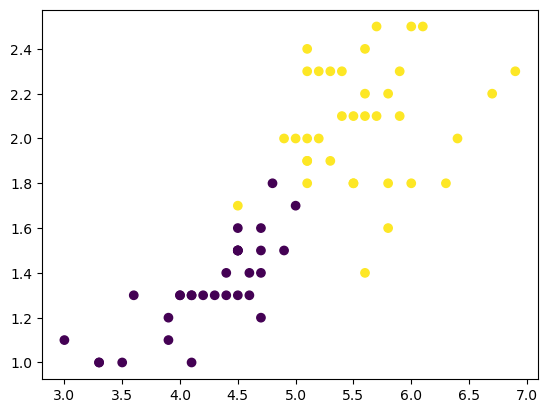

In [7]:
fig, ax = plt.subplots()

ax.scatter(X_train['petal length (cm)'], X_train['petal width (cm)'], c=y_train)

plt.show()

#### Árvore de Decisão

In [8]:
from sklearn import tree

In [9]:
clf = tree.DecisionTreeClassifier(random_state=42)

In [10]:
clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [11]:
clf.score(X_test, y_test)

0.7878787878787878

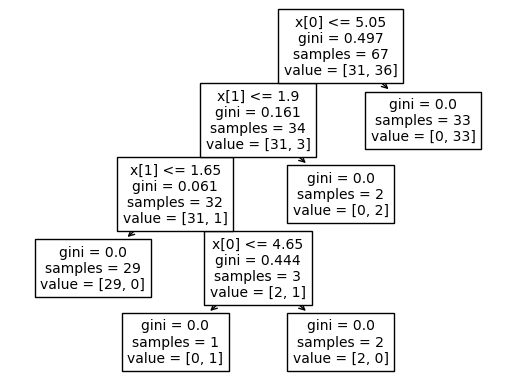

In [12]:
tree.plot_tree(clf);

In [13]:
y_pred = clf.predict(X_test)

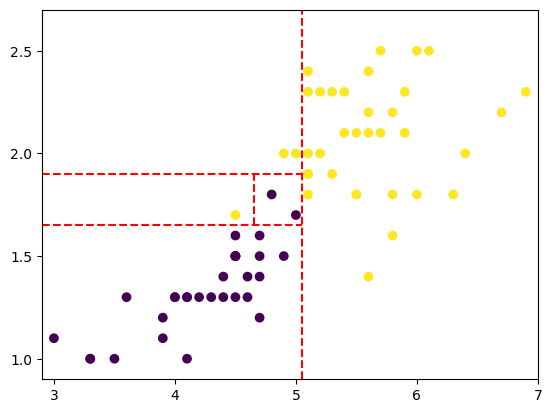

In [14]:
fig, ax = plt.subplots()

ax.scatter(X_train['petal length (cm)'], X_train['petal width (cm)'], c=y_train)
ax.set(xlim=(2.9, 7), xticks=[3,4,5,6,7],
       ylim=(0.9, 2.7), yticks=[1,1.5,2,2.5])

ax.plot([5.05, 5.05], [0.9, 2.7], '--r')
ax.plot([2.9, 5.05], [1.9, 1.9], '--r')
ax.plot([2.9, 5.05], [1.65, 1.65], '--r')
ax.plot([4.65, 4.65], [1.65, 1.9], '--r')


plt.show()

In [15]:
from sklearn.metrics import confusion_matrix

In [16]:
confusion_matrix(y_test, y_pred)

array([[18,  1],
       [ 6,  8]])

In [17]:
import numpy as np

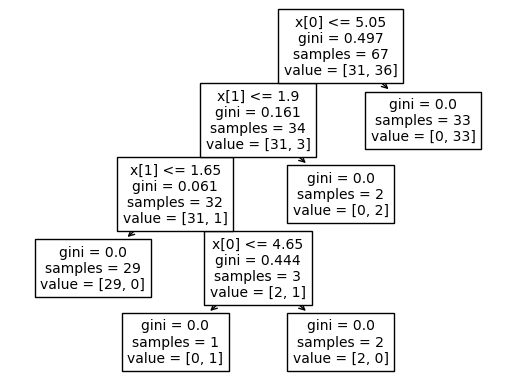

In [18]:
tree.plot_tree(clf);

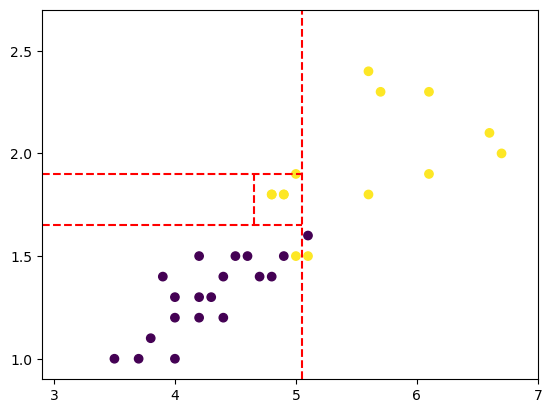

In [19]:
fig, ax = plt.subplots()

ax.scatter(X_test['petal length (cm)'], X_test['petal width (cm)'], c=y_test)
ax.set(xlim=(2.9, 7), xticks=[3,4,5,6,7],
       ylim=(0.9, 2.7), yticks=[1,1.5,2,2.5])

ax.plot([5.05, 5.05], [0.9, 2.7], '--r')
ax.plot([2.9, 5.05], [1.9, 1.9], '--r')
ax.plot([2.9, 5.05], [1.65, 1.65], '--r')
ax.plot([4.65, 4.65], [1.65, 1.9], '--r')


plt.show()